In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
num_classes = 5
epochs = 20

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
train_df = pd.read_csv('/content/drive/MyDrive/term 7/Robotics/project/train.csv',sep=',')
test_df = pd.read_csv('/content/drive/MyDrive/term 7/Robotics/project/test.csv', sep = ',')

train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [7]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 42)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


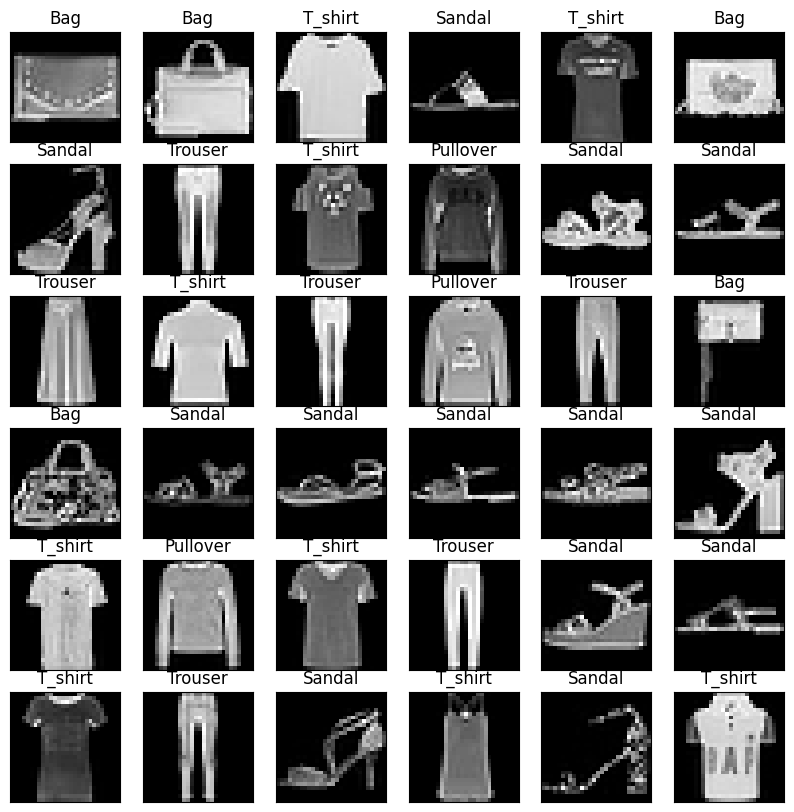

In [8]:
class_names = ['T_shirt', 'Trouser', 'Pullover', 'Sandal', 'Bag']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)), cmap='gray')
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [9]:
image_rows = 28
image_cols = 28
image_shape = (image_rows,image_cols,1)

In [10]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [22]:
x_train[0].shape

(28, 28, 1)

In [11]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(5,activation = 'softmax')
])

In [12]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [13]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/75
6/6 [==============================] - 17s 3s/step - loss: 1.2355 - accuracy: 0.5938 - val_loss: 0.7309 - val_accuracy: 0.9297
Epoch 2/75
6/6 [==============================] - 13s 2s/step - loss: 0.5181 - accuracy: 0.9291 - val_loss: 0.3019 - val_accuracy: 0.9397
Epoch 3/75
6/6 [==============================] - 14s 2s/step - loss: 0.2536 - accuracy: 0.9399 - val_loss: 0.2031 - val_accuracy: 0.9472
Epoch 4/75
6/6 [==============================] - 14s 2s/step - loss: 0.1921 - accuracy: 0.9460 - val_loss: 0.1779 - val_accuracy: 0.9500
Epoch 5/75
6/6 [==============================] - 15s 3s/step - loss: 0.1704 - accuracy: 0.9509 - val_loss: 0.1651 - val_accuracy: 0.9537
Epoch 6/75
6/6 [==============================] - 14s 2s/step - loss: 0.1536 - accuracy: 0.9564 - val_loss: 0.1442 - val_accuracy: 0.9598
Epoch 7/75
6/6 [==============================] - 18s 3s/step - loss: 0.1364 - accuracy: 0.9605 - val_loss: 0.1313 - val_accuracy: 0.9633
Epoch 8/75
6/6 [==================

Text(0.5, 1.0, 'Train - Accuracy')

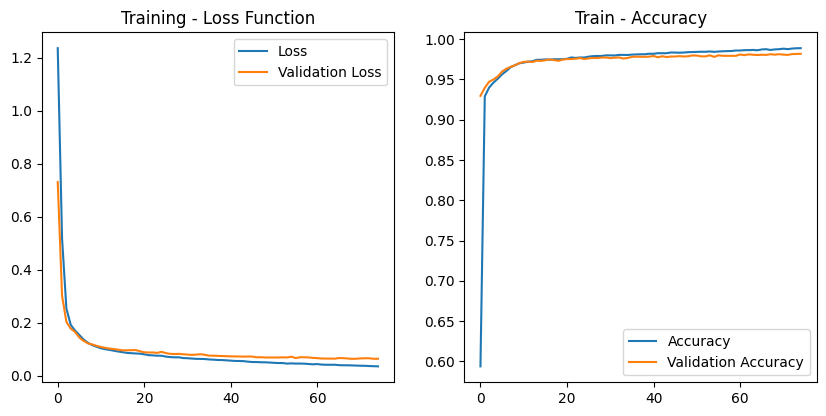

In [14]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [15]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.0656
Test Accuracy : 0.9788


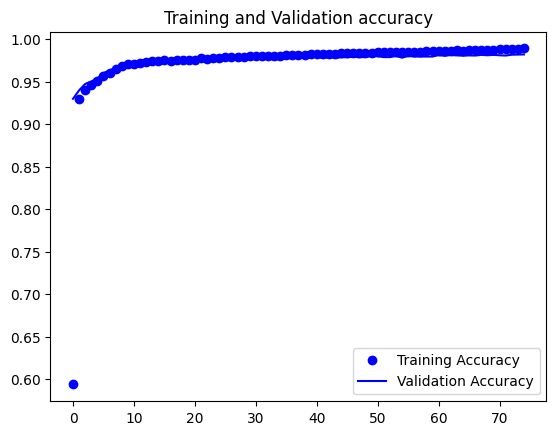

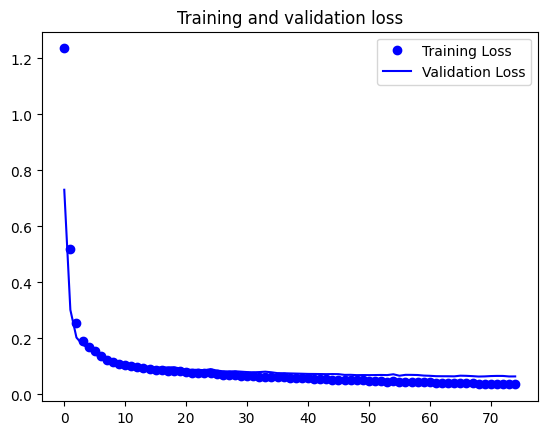

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
#Get the predictions for the test data
predicted_classes = cnn_model.predict(x_test)
predicted_classes=np.argmax(predicted_classes,axis=1)

#Get the indices to be plotted
y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

157/157 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

     Class 0       0.95      0.97      0.96      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.97      0.95      0.96      1000
     Class 3       0.99      1.00      0.99      1000
     Class 4       0.98      0.98      0.98      1000

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



In [20]:
x_test.shape

(5000, 28, 28, 1)

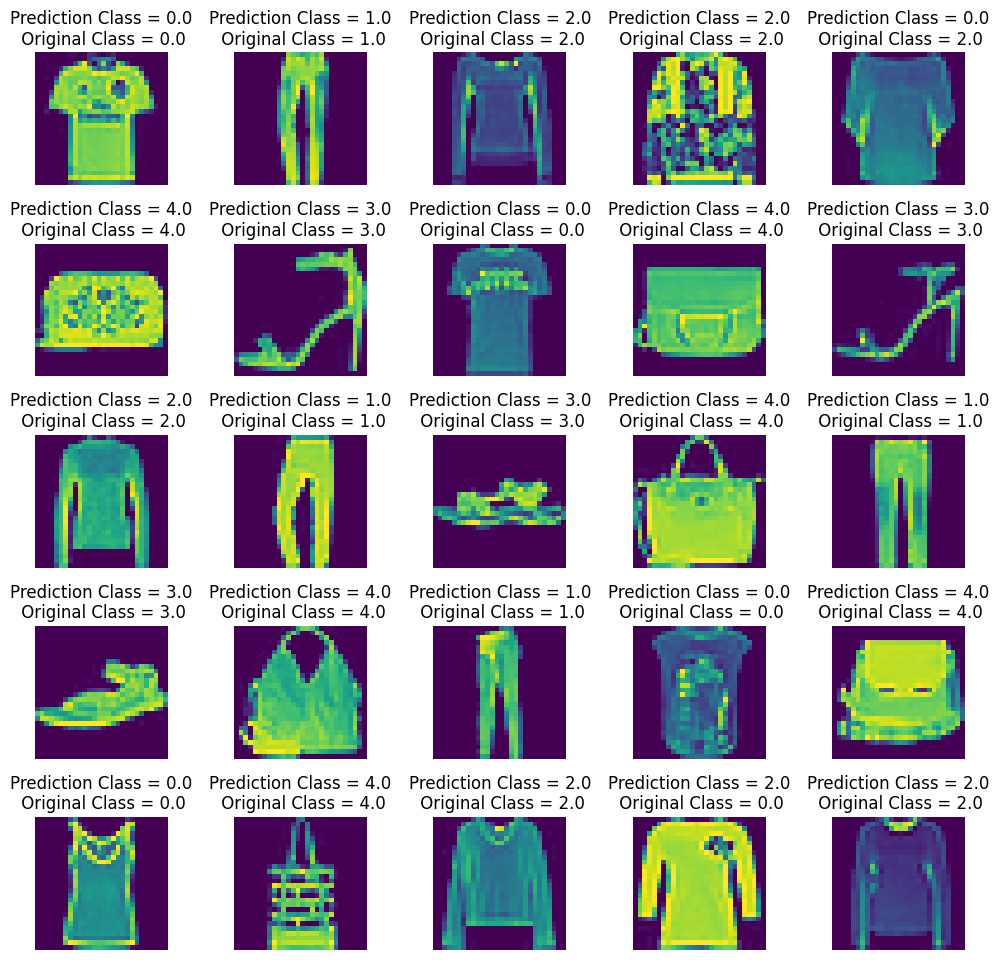

In [18]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [19]:
# # serialize model to YAML
# model_yaml = cnn_model.to_yaml()
# with open("model.yaml", "w") as yaml_file:
#     yaml_file.write(model_yaml)
# serialize weights to HDF5
cnn_model.save_weights("/content/drive/MyDrive/term 7/Robotics/project/model_weights.h5")
cnn_model.save("/content/drive/MyDrive/term 7/Robotics/project/sag_model.h5")
print("Saved model to disk")

Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
